<a href="https://colab.research.google.com/github/nisaab96/07MBIGSeminario/blob/master/Trabajo_Seminario_07MBIG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Seminario 07MBIG

## Carga de datos

In [15]:
from google.colab import files 

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length = len(uploaded[fn])))

Saving StudentsPerformance - Hoja 1.csv to StudentsPerformance - Hoja 1 (1).csv
User uploaded file "StudentsPerformance - Hoja 1.csv" with length 57455 bytes


In [16]:
#Importamos modulos
import pandas as pd
import io
import requests
import seaborn as sns
import timeit
import matplotlib.pyplot as plt

In [17]:
dataset=pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation,mathScore,readingScore,writingScore
0,Mujer,Group B,bachelor's degree,standard,none,72,72,74
1,Mujer,Group C,some college,standard,completed,69,90,88
2,Mujer,Group B,master's degree,standard,none,90,95,93
3,Hombre,Group A,associate's degree,free/reduced,none,47,57,44
4,Hombre,Group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,Mujer,Group E,master's degree,standard,completed,88,99,95
996,Hombre,Group C,high school,free/reduced,none,62,55,55
997,Mujer,Group C,high school,free/reduced,completed,59,71,65
998,Mujer,Group D,some college,standard,completed,68,78,77


Utilizamos la librería "Matplotlib" con el objetivo de facilitar la representación gráfica de datos simplificando las llamadas a las funciones y añade rutinas propias de trazado. 

Además, Pandas es una librería que nos permite trabajar con estructuras de datos.

## Exploración de datos

In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation             1000 non-null   object
 5   mathScore                    1000 non-null   int64 
 6   readingScore                 1000 non-null   int64 
 7   writingScore                 1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Aquí obtenemos información sobre el dataset "Exams Score". Podemos observar que tenemos datos de tipo "object" así como datos de tipo "int64", es decir, números enteros que hacen referencia a las notas obtenidas por los alumnos.

## Distribución de las notas de matemáticas

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


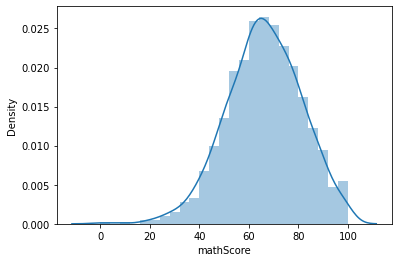

In [19]:
sns.distplot(dataset.mathScore.dropna())
plt.show( )

Aquí podemos observar la distribución que existe en las notas de matemáticas, "mathScore". Se puede ver con claridad que el grueso de las notas se concentran en el rango 40 - 80, donde podríamos decir que está la mayoría de los alumnos mientras que en los extremos podemos ver que hay poca concentración.

Hay pocos alumnos suspendidos con menos de un 20, pero en el rango 20 - 40 sí que hay alguna nota, por lo que estos estarían suspendidos de forma clara. Por el contrario, también podemos ver notas en el rango 80 - 100, y aquí estarían los alumnos que destacarían ya que es un aprobado alto.


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


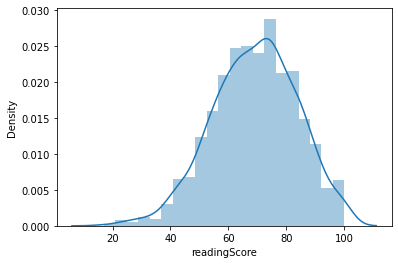

In [20]:
sns.distplot(dataset.readingScore.dropna())
plt.show( )

De la misma forma que antes, ahora vamos a ver la distribución de las notas de lectura, es decir, "readingScore". Al igual que antes, las notas tienen una distribución similar. El grueso de las notas se concentran en el rango 40 - 80. A partir del 80 empiezan a decaer, lo que significa que llega a los extremos donde se encuentran los alumnos con sobresaliente.

Por el otro lado, en el rango 20 - 40 se encuentran aquellos alumnos que no han llegado al mínimo, por lo que están suspensos.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


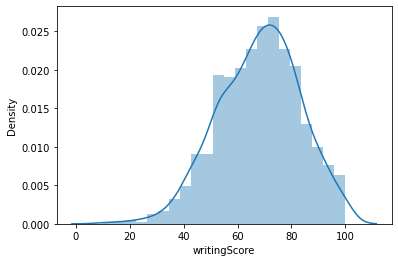

In [21]:
sns.distplot(dataset.writingScore.dropna())
plt.show( )

Por último, tenemos la distribución de las notas de escritura, es decir, "writingScore". Sigue el mismo patrón que las dos anteriores. 

El grueso se encuentra en el rango 40 - 80, donde se encuentran la gran parte de los alumnos. A partir del 80 podemos ver como empieza a descender la cantidad de alumnos que han obteniod una nota más alta. Lo mismo ocurre en el otro extremo, en el rango 20 - 40 hay pocos alumnos y va aumentando a medida que llega al 40.

## Nivel educativo parental

### Matemáticas y el nivel educativo parental

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


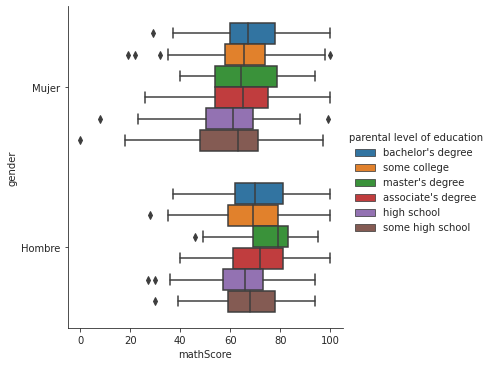

In [27]:
with sns.axes_style(style='ticks'):
 ax = sns.catplot("mathScore", "gender", "parental level of education" ,
data=dataset, kind="box")

Uno de los puntos claves que se quería demostrar era si la capacidad de sacar más o menos nota podía depender del nivel educativo de los padres de los alumnos.

Bien, en este análisis hemos representado tres variables. La primera de ellas es la nota de matemáticas que es en la que primero nos vamos a centrar. En segundo lugar, vamos a diferenciar también entre géneros, hombre y mujer. Y por último la variable clave en este análisis que es el nivel educativo de los padres.

Podemos observar que el grueso de las notas, como bien se mostraba en la distribución anterior, se encuentran entre el rango 40 - 80. 

Pero si vamos más allá y analizamos el nivel educativo de los padres, podemos ver que, en los hombres, quizás la diferencia más notable se da en aquellos padres que tienen como titulación un máster. Ya que el intervalo de notas de aprobado del 65 no baja quitando alguna excepción (color verde).

En el caso de las mujeres la situación es similar, ya que las mujeres con mejor porcentaje de aprobado son aquellas cuyos padres tienen un máster, quitando alguna excepción (color verde).

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


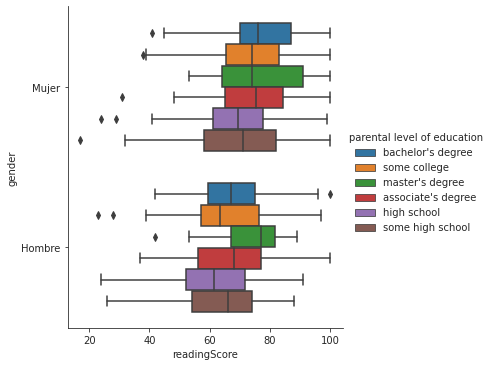

In [28]:
with sns.axes_style(style='ticks'):
 ax = sns.catplot("readingScore", "gender", "parental level of education" ,
data=dataset, kind="box")

En este segundo análisis vamos a analizar el nivel educativo de los padres y el género en base a la variable "readingScore". 

En cuanto a los hombres, podemos ver que los que mejor intervalos de notas tienen son los que cuyos padres tienen un máster. Esto no significa que saquen las notas más altas ya que podemos ver que por ejemplo hay alumnos con notas muy altas cuyos padres tienen un nivel educativio de graduado en bachillerato, pero como anteriormente, son valores extremos que podemos tratar como excepciones.

En cuanto a las mujeres no hay una diferencia tan clara como con respecto a los hombres. Las mujeres cuyos padres son graduados en un máster también abarcan mejores notas, pero el intervalo es más amplio, no es tan estrecho como el de los hombres.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


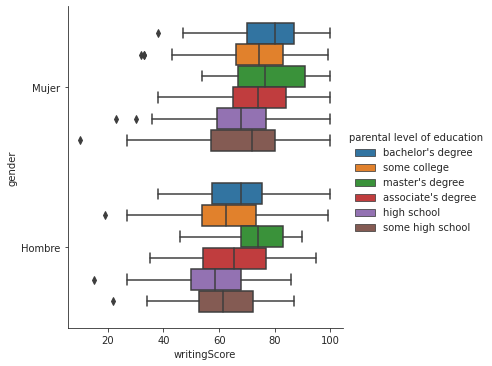

In [29]:
with sns.axes_style(style='ticks'):
 ax = sns.catplot("writingScore", "gender", "parental level of education" ,
data=dataset, kind="box")

En este tercer análisis vamos a analizar el nivel educativo de los padres y el género en base a la variable "writingScore". 

Idem de los anteriores, el intervalo de notas tanto para mujeres como hombres es el mismo, la mayor parte de las notas se concentran en el intervalo 40 - 80. 

En cuanto a los hombres, al igual que los dos anteriores, el mejor rango de notas lo tienen aquellos alumnos cuyos padres tienen un nivel educativo de máster. Mientras que las mujeres cuyos padres tienen un nivel educativo de máster también tienen un mejor rango de notas, pero como se ha dicho anteriormente, esto no significa que obtengan las mejores ya que puede haber alumnos con notas más altas pero son valores extremos, tratados como excepciones.

## Diferencia de notas en cuanto al género

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


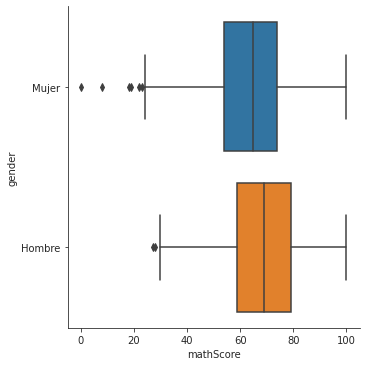

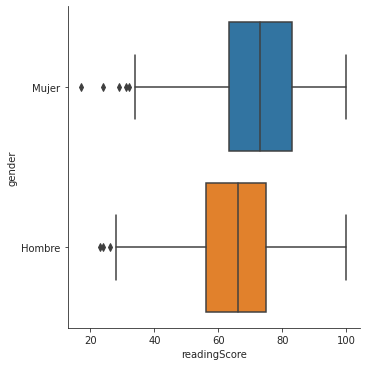

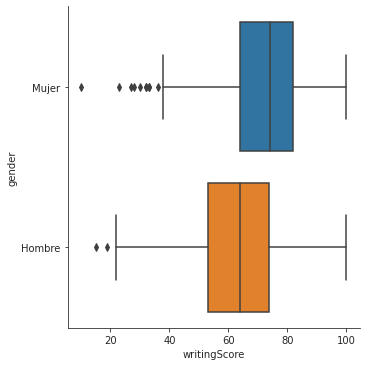

In [30]:
with sns.axes_style(style='ticks'):
 ax = sns.catplot("mathScore", "gender",
data=dataset, kind="box")
 
with sns.axes_style(style='ticks'):
 ax = sns.catplot("readingScore", "gender",
data=dataset, kind="box")
 
with sns.axes_style(style='ticks'):
 ax = sns.catplot("writingScore", "gender",
data=dataset, kind="box") 

Por último, habiendo analizado el nivel educativo de los padres, se va a analizar las notas de los alumnos en función del género y aquí sí que podemos observar algunas diferencias.

En primer lugar se analiza la nota de matemáticas en función del género. Se puede observar que los hombres tienen un mejor intervalo de notas, entre el 60 - 80 mientras que las muejeres van del 50 - 70. Además, en cuanto a los valores extremos, las muejeres cuentan con alumas cuyos suspensos son demasiado bajo mientras que los hombres, también contienen alguno, pero no son tan bajos.

En segundo lugar, analizamos la nota de lectura en función del género. Podemos observar que en este aspecto cambian las notas. Existe un mejor intervalo de notas de las mujeres respecto a los hombres. El intervalo de notas de las mujeres podríamos decir que va del 60 - 85 mientras que el del los hombres va del 55 - 75. En cuanto a los valores extremos, las muejeres siguen siendo cuyos suspensos son los más bajos.

Por último, analizamos la nota de escritura en función del género. Al igual que en el análisis anterior, las mujeres tienen un mejor intervalo de nota, concretamente del 65 - 82 mientras que el intervalo de los hombres es del 55 - 75. En este caso, las muejeres tienen menos suspensos pero el "peor" suspenso lo tienen ellas ya que el valor extremo más bajo, es de género femenino.